In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [ ]:
# Generate data 
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))

y = true_b + true_w * x + epsilon

y.shape

print

(100, 1)

In [42]:
# Split data into training and testing sets
idx = np.arange(N)
np.random.shuffle(idx)

# use 80% of data for training
train_idx = idx[:int(.8 * N)]

# use remaining 20% of data for testing
test_idx = idx[int(.8 * N):]

# split data into training and testing sets
x_train = x[train_idx]
y_train = y[train_idx]
x_test = x[test_idx]
y_test = y[test_idx]


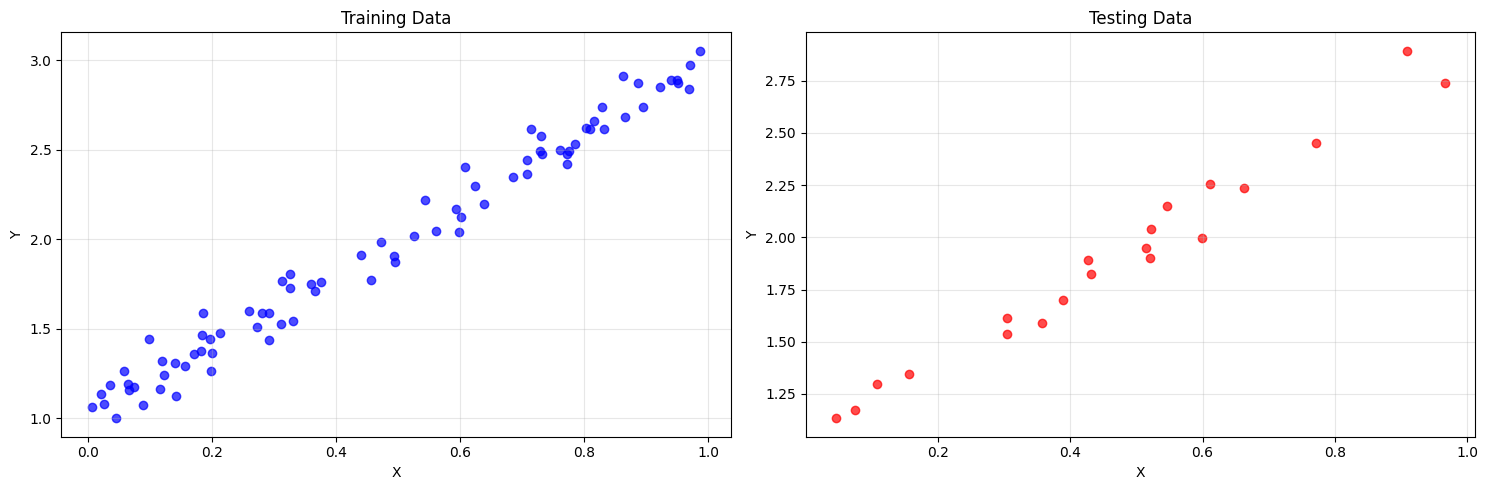

In [43]:
# visualize the data - two separate graphs side by side
plt.figure(figsize=(15, 5))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', alpha=0.7)
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)

# Testing data plot
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, color='red', alpha=0.7)
plt.title('Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [44]:
# Step 0: Initialize parameters randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)




[0.49671415] [-0.1382643]


Text(0, 0.5, 'Y')

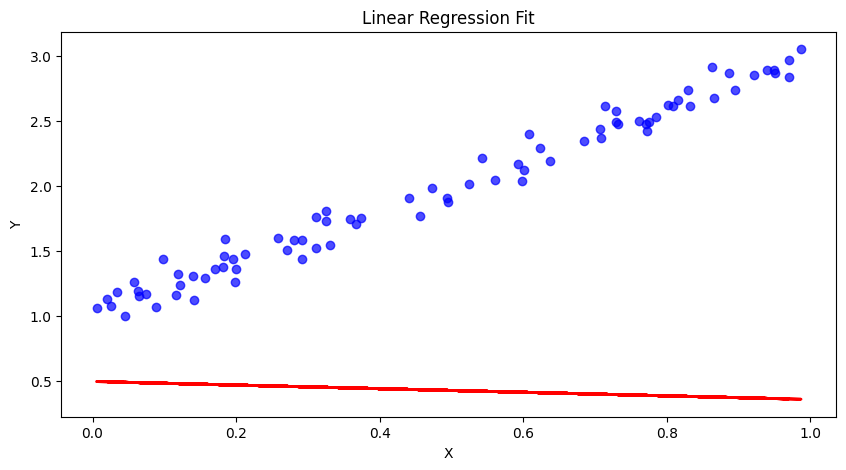

In [45]:
# Step 1: Compute predictions - forward pass
yhat = b + w * x_train

# visualize the predictions
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', alpha=0.7)
plt.plot(x_train, yhat, color='red', linewidth=2)
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')

In [46]:
# Step 2: Compute loss
error = yhat - y_train

loss = (error ** 2).mean()

print(loss)

2.7421577700550976


In [47]:
# loss surface
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)

# meshgrid generates a grid of points for all combinations of b and w
bs, ws = np.meshgrid(b_range, w_range)

bs.shape, ws.shape


((101, 101), (101, 101))

In [48]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]], shape=(101, 101))

In [49]:
ws

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]], shape=(101, 101))

In [ ]:
# Thanks to its broadcasting capabilities, Numpy is able to understand we want to multiply the same x value 
# by every entry in the ws matrix.

dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat.shape

(101, 101)

In [52]:
all_predictions = np.apply_along_axis(
    func1d = lambda x: bs + ws * x, 
    axis=1, 
    arr=x_train)

all_predictions.shape

(80, 101, 101)

In [53]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [54]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [55]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

Minimum loss: 0.0082
Optimal bias (b): 1.0000
Optimal weight (w): 2.0000
True bias: 1
True weight: 2


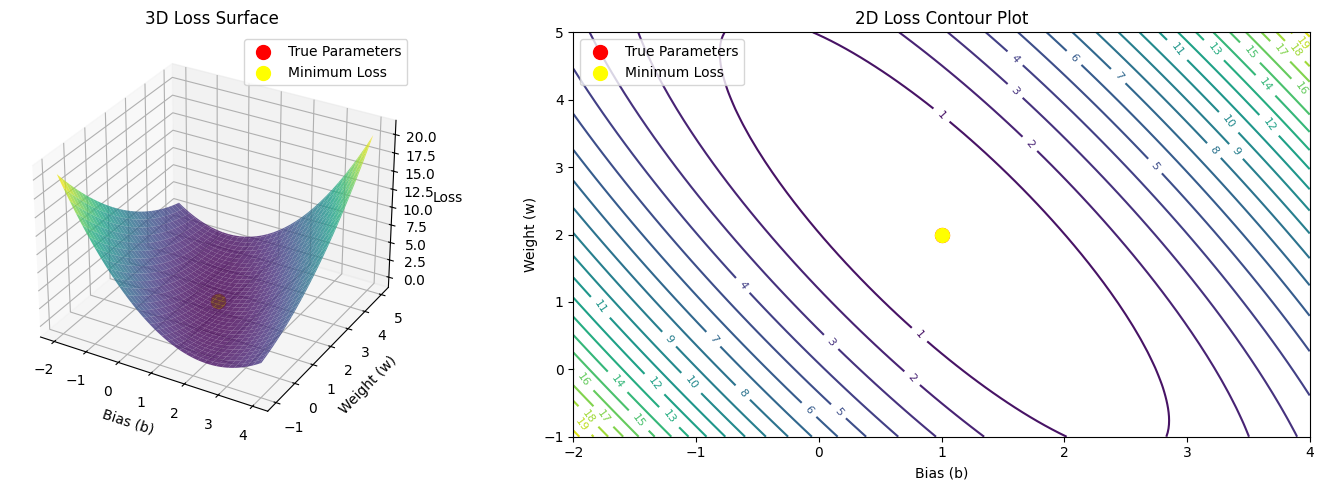

In [59]:
# draw the loss surface, visualize and plot minimum loss in the surface

# draw the loss surface, visualize and plot minimum loss in the surface

# Create a 3D surface plot
fig = plt.figure(figsize=(15, 5))

# 3D surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surface = ax1.plot_surface(bs, ws, all_losses, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Bias (b)')
ax1.set_ylabel('Weight (w)')
ax1.set_zlabel('Loss')
ax1.set_title('3D Loss Surface')

# Mark the true parameters
ax1.scatter([true_b], [true_w], [all_losses[50, 50]], color='red', s=100, label='True Parameters')
ax1.legend()

# 2D contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(bs, ws, all_losses, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('Bias (b)')
ax2.set_ylabel('Weight (w)')
ax2.set_title('2D Loss Contour Plot')

# Mark the true parameters on contour plot
ax2.scatter(true_b, true_w, color='red', s=100, label='True Parameters', zorder=5)
ax2.legend()

# Find and mark the minimum loss point
min_loss_idx = np.unravel_index(np.argmin(all_losses), all_losses.shape)
min_b = bs[min_loss_idx]
min_w = ws[min_loss_idx]
min_loss = all_losses[min_loss_idx]

print(f"Minimum loss: {min_loss:.4f}")
print(f"Optimal bias (b): {min_b:.4f}")
print(f"Optimal weight (w): {min_w:.4f}")
print(f"True bias: {true_b}")
print(f"True weight: {true_w}")

# Mark minimum on both plots
ax1.scatter([min_b], [min_w], [min_loss], color='yellow', s=100, label='Minimum Loss')
ax2.scatter(min_b, min_w, color='yellow', s=100, label='Minimum Loss', zorder=5)

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

In [60]:
# Step 3: Compute gradients for both parameters b and w

b_grad = 2 * error.mean()
w_grad = 2 * (error * x_train).mean()

print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


In [61]:
lr = 0.1
print(b, w)

b = b - lr * b_grad
w = w - lr * w_grad 

print(b, w)
# Step 4: Update parameters

b = b - lr * b_grad
w = w - lr * w_grad 


[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


Text(0, 0.5, 'Y')

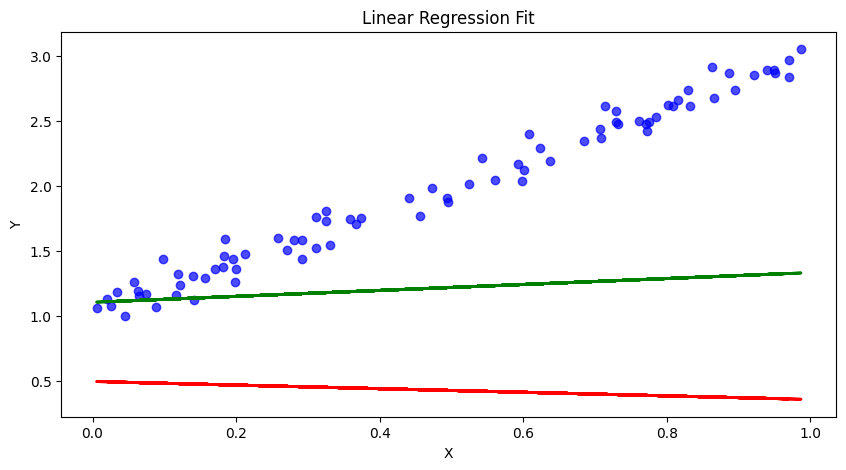

In [64]:
## visualize the predictions
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', alpha=0.7)
plt.plot(x_train, yhat, color='red', linewidth=2)
plt.plot(x_train, b + w * x_train, color='green', linewidth=2)
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')


Text(0, 0.5, 'Y')

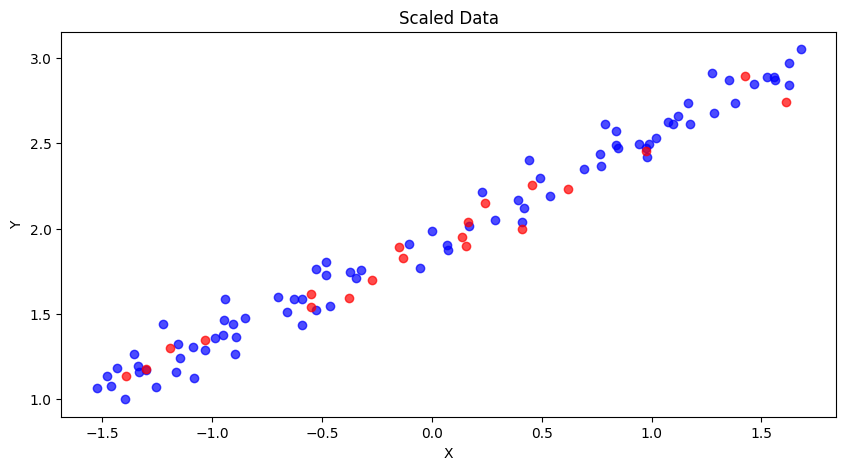

In [65]:
scaler = StandardScaler(with_mean=True, with_std=True)

scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

# visualize the scaled data
plt.figure(figsize=(10, 5))
plt.scatter(scaled_x_train, y_train, color='blue', alpha=0.7)
plt.scatter(scaled_x_test, y_test, color='red', alpha=0.7)
plt.title('Scaled Data')
plt.xlabel('X')
plt.ylabel('Y')

